<table style="border: none" align="left">
   <tr style="border: none">
      <th style="border: none"><font face="verdana" size="4" color="black"><b>Use TensorFlow to predict handwritten digits</b></font></font></th>
      <th style="border: none"><img src="https://github.com/pmservice/customer-satisfaction-prediction/blob/master/app/static/images/ml_icon_gray.png?raw=true" alt="Watson Machine Learning icon" height="40" width="40"></th>
   </tr> 
   <tr style="border: none">
       <td style="border: none"><img src="https://github.com/pmservice/wml-sample-models/raw/master/scikit-learn/hand-written-digits-recognition/images/numbers_banner-04.png" width="600" alt="Icon"></td>
   </tr>
</table>

This notebook contains steps and code to demonstrate Deep Learning model training and scoring using the Watson Machine Learning Python client (V4). This notebook introduces commands for creating a model definition, starting a model training run, saving the model in Watson Machine Learning deployment space, creating an online deployment, and scoring.

Some familiarity with Python is helpful. This notebook uses Python 3.6 and a `tensorflow 1.15` model.


## Learning goals

In this notebook, you will learn how to:

-  Work with Watson Machine Learning experiments to train a Deep Learning model (Tensorflow)
    - Create a model definition using the Watson Machine Learning python client
    - Create a training run using training configuration metadata with the python client
-  Save trained models in Watson Machine Learning (a deployment space)
-  Deploy a trained model online and score it


## Contents

1.	[Setting up](#setup)
2.	[Create the model definitions](#model)
3.  [Train the model](#train)
3.	[Save the model](#save)
4.	[Create the online deployment](#deploy)
5.	[Score data](#score)
6.	[Summary and next steps](#summary)

To get started on CP4D 3.0, find documentation on installation and set up <a href="https://www.ibm.com/support/knowledgecenter/SSQNUZ_3.0.0/cpd/overview/welcome.html" target="_blank" rel="noopener no referrer">here</a>.

<a id="setup"></a>
## 1. Setting up

- [1.1 Watson Machine Learning Accelerator and training data](#wmla)
- [1.2 Watson Machine Learning Python client](#pythonclient)
- [1.3 Set the default deployment space](#deploymentspace)

### 1.1 Watson Machine Learning Accelerator and training data<a id="wmla"></a>

In order to train deep learning experiments, you must have Watson Machine Learning Accelerator (WML-A) installed on your CP4D cluster. For more information on WML-A, visit the <a href="https://www.ibm.com/support/knowledgecenter/SSQNUZ_3.0.0/wsj/local/wmla.html" target="_blank" rel="noopener no referrer">documentation</a>. 

Add the 4 compressed data files from the <a href="http://yann.lecun.com/exdb/mnist/" target="_blank" rel="noopener no referrer">MNIST website</a> in a folder called `tf-mnist` within the same path that WML-A is installed, as mentioned in the <a href="https://www.ibm.com/support/knowledgecenter/SSQNUZ_3.0.0/wsj/analyze-data/ml-experimnt-builder_local.html#prerequisites-for-creating-deep-learning-experiments" target="_blank" rel="noopener no referrer">prerequisites</a>. So, the files would be saved as:
- `tf-mnist/train-images-idx3-ubyte.gz`
- `tf-mnist/train-labels-idx1-ubyte.gz`
- `tf-mnist/t10k-images-idx3-ubyte.gz`
- `tf-mnist/t10k-labels-idx1-ubyte.gz`


### 1.2 Watson Machine Learning Python client <a id="pythonclient"></a>

Import the `watson-machine-learning-client` module.
<div class="alert alert-block alert-info">
For more information about the <b>Watson Machine Learning Python client (V4)</b>, please refer to the <a href="https://wml-api-pyclient-dev-v4.mybluemix.net/" target="_blank" rel="noopener no referrer">Python client documentation</a>. If you're using the notebook within a project on your CP4D cluster, you do not need to install this package as it comes pre-installed with the notebooks. The installation code below is for demonstration but is non-executable at this stage.
</div>

In [1]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

**Authenticate the Python client on CP4D.**

<div class="alert alert-block alert-info">To find more information on authentication or credentials, take a look at the <a href="https://www.ibm.com/support/knowledgecenter/SSQNUZ_3.0.0/wsj/analyze-data/ml-authentication-local.html" target="_blank" rel="noopener no referrer">Documentation.</a></div>

In [2]:
# Enter your credentials here.

from project_lib.utils import environment
url = environment.get_common_api_url()

import sys,os,os.path
token = os.environ['USER_ACCESS_TOKEN']

wml_credentials = {
     "instance_id": "openshift",
     "token": token,
     "url": url,
     "version": "3.0.0"
}

Now, instantiate a `WatsonMachineLearningAPIClient` object.

In [3]:
client = WatsonMachineLearningAPIClient(wml_credentials)

In [4]:
# Display the client version number.
print(client.version)

1.0.95


### 1.3 Set the default deployment space<a id="deploymentspace"></a>

To set the default space, follow these steps.

<div class="alert alert-block alert-info">
You can create your own <a href="https://www.ibm.com/support/knowledgecenter/SSQNUZ_3.0.0/wsj/analyze-data/ml-spaces_local.html" target="_blank" rel="noopener no referrer">deployment space</a> by selecting <b>Analytics deployments</b> under <b>Analyze</b> from the Navigation Menu on the top left of this page.</div>

Alternatively, you can create a deployment and obtain its UID using the code in the following cell. The cell is not executable cell at this stage, but you can enter the name of your space in the metadata and use it if needed.

In [6]:
# Obtain the UID of your space
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['guid'])

**Action:** Enter the name of your deployment space in the code below: `space_uid = guid_from_space_name(client, 'YOUR DEPLOYMENT SPACE')`.

In [7]:
# Enter the name of your deployment space here:
space_uid = guid_from_space_name(client, 'YOUR DEPLOYMENT SPACE')
print("Space UID = " + space_uid)

Space UID = 9d931072-16a4-4937-b9c2-98bec80e11da


You can set the default space using the cell below.

In [8]:
client.set.default_space(space_uid)

'SUCCESS'

### Watson Machine Learning Accelerator and training data

In order to train deep learning experiments, you must have Watson Machine Learning Accelerator (WML-A) installed on your CP4D cluster. For more information on WML-A, visit the <a href="https://www.ibm.com/support/knowledgecenter/SSQNUZ_3.0.0/wsj/local/wmla.html" target="_blank" rel="noopener no referrer">documentation</a>. 

Add the 4 compressed data files from the <a href="http://yann.lecun.com/exdb/mnist/" target="_blank" rel="noopener no referrer">MNIST website</a> in a folder called `tf-mnist` within the same path that WML-A is installed, as mentioned in the <a href="https://www.ibm.com/support/knowledgecenter/SSQNUZ_3.0.0/wsj/analyze-data/ml-experimnt-builder_local.html#prerequisites-for-creating-deep-learning-experiments" target="_blank" rel="noopener no referrer">prerequisites</a>. So, the files would be saved as:
- `tf-mnist/train-images-idx3-ubyte.gz`
- `tf-mnist/train-labels-idx1-ubyte.gz`
- `tf-mnist/t10k-images-idx3-ubyte.gz`
- `tf-mnist/t10k-labels-idx1-ubyte.gz`


<a id="model"></a>
## 2. Create the model definition

In this section you:

- [2.1 Prepare the model definition metadata](#prep)
- [2.2 Get the sample model definition content files from Git](#get)
- [2.3 Store the model definition](#store)



This model definition will be used when you train the deep learning model in step 3: [Train the model](#train).

### 2.1 Prepare the model definition metadata<a id="prep"></a>

First, you need to create the model definition metadata.

In [9]:
model_definition_metadata = {
    client.model_definitions.ConfigurationMetaNames.NAME: "My definition name",
    client.model_definitions.ConfigurationMetaNames.DESCRIPTION: "My description",
    client.model_definitions.ConfigurationMetaNames.VERSION: '1.0',
    client.model_definitions.ConfigurationMetaNames.PLATFORM: {'name': 'python', 'versions': ['3.6']}
}

### 2.2 Get the sample model definition content file from Git <a id="get"></a>

Download the zip file with the tensorflow model from the <a href="https://github.com/pmservice/wml-sample-models" target="_blank" rel="noopener no referrer">Github repository</a>.

In [ ]:
!wget https://github.com/pmservice/wml-sample-models/raw/master/tensorflow/hand-written-digit-recognition/definition/tf-softmax-model.zip --output-document=tf-softmax-model.zip

### 2.3 Store the model definition<a id="store"></a>

Use the following code to store the model definition in Watson Machine Learning.

In [11]:
definition_details = client.model_definitions.store("tf-softmax-model.zip", model_definition_metadata)

List the stored model definitions.

In [12]:
client.model_definitions.list()

------------------  --------------------  ------------------------------------
NAME                ASSET_TYPE            GUID
My definition name  wml_model_definition  d11a8fb9-6fe6-407c-8973-46948fede4f2
------------------  --------------------  ------------------------------------


Get the UID of the model definition. You'll use this in the training configuration metadata in the next step.

In [13]:
definition_uid = client.model_definitions.get_uid(definition_details)
print("Model Definition UID: {}".format(definition_uid))

Model Definition UID: d11a8fb9-6fe6-407c-8973-46948fede4f2


## 3. Train the model<a id="train"></a>

In order to create a training run, ensure that you have Watson Machine Learning Accelerator (WML-A) installed on your CP4D cluster. Add the 4 compressed data files from the <a href="http://yann.lecun.com/exdb/mnist/" target="_blank" rel="noopener no referrer">MNIST website</a> in a folder called `tf-mnist` within the same path that WML-A is installed as mentioned in the <a href="https://www.ibm.com/support/knowledgecenter/SSQNUZ_3.0.0/wsj/analyze-data/ml-experimnt-builder_local.html#prerequisites-for-creating-deep-learning-experiments" target="_blank" rel="noopener no referrer">prerequisites</a>.

For more information on training deep learning experiments, please refer to the <a href="https://www.ibm.com/support/knowledgecenter/SSQNUZ_3.0.0/wsj/analyze-data/ml-experimnt-builder_local.html" target="_blank" rel="noopener no referrer">documentation</a> and this <a href="https://www.ibm.com/support/knowledgecenter/SSQNUZ_3.0.0/wsj/analyze-data/ml_local_tutorial_tensorflow_experiment-builder.html" target="_blank" rel="noopener no referrer">experiment builder (UI) tutorial</a>. 

In this section, learn how to:
- [3.1 Enter training configuration metadata](#meta)
- [3.2 Train the model in the background](#backg)
- [3.3 Cancel the training run](#cancel)


### 3.1 Enter training configuration metadata<a id="meta"></a>

- `TRAINING_DATA_REFERENCE` - references the uploaded training data.
- `TRAINING_RESULTS_REFERENCE` - location where trained model will be saved.
- `MODEL_DEFINITION` - where you specify the saved model definition's UID and other information pertaining to the model
    - `software_spec`: Here you'll specify the software specification of the model (in this case, `tensorflow_1.15-py3.6`. To list the supported software specifications, run `client.software_specifications.list()`.
    - `hardware_spec`: Here, you can list the hardware specifications and number of nodes for the training.

In [14]:
client.training.ConfigurationMetaNames.show()

--------------------------  ----  --------  ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
META_PROP NAME              TYPE  REQUIRED  SCHEMA
TRAINING_DATA_REFERENCES    list  Y         [{'name(optional)': 'string', 'type(required)': 'string', 'connection(required)': {'endpoint_url(required)': 'string', 'access_key_id(required)': 'string', 'secret_access_key(required)': 'string'}, 'location(required)': {'bucket': 'string', 'path': 'string'}, 'schema(optional)': {'id(required)': 'string', 'fields(required)': [{'name(required)': 'string', 'type(required)': 'string', 'nullable(optional)': 'string'}]}}]
TRAINING_RESULTS_RE

In [15]:
# Configure the training metadata for the TRAINING_DATA_REFERENCE and TRAINING_RESULTS_REFERENCE.
training_configuration_metadata = {
    client.training.ConfigurationMetaNames.NAME: "Hand-written Digit Recognition",
    client.training.ConfigurationMetaNames.DESCRIPTION: "Hand-written Digit Recognition training",
    client.training.ConfigurationMetaNames.MODEL_DEFINITION: {
        "id": definition_uid,
        "command": "tensorflow_mnist_softmax.py --trainingIters 20",
        "software_spec": {
            "name": "tensorflow_1.15-py3.6"
        },
        "hardware_spec": {
            "name": "K80",
            "num_nodes": 1
        },
        "parameters": {
            "name": "Hand-written Digit Recognition using Model Definition",
            "description": "Hand-written Digit Recognition training using Model Definition"
        }
    },
    client.training.ConfigurationMetaNames.TRAINING_DATA_REFERENCES: [{
        "name": "tf_mnist_input",
        "connection": {},
        "type": "fs",
        "location": {
            "path": "tf-mnist"
        }
    }],
    client.training.ConfigurationMetaNames.TRAINING_RESULTS_REFERENCE: {
        "name": "tf_mnist_results",
        "connection": {},
        "location": {
            "path": "/spaces/"+space_uid+"/assets/trainings"
        },
        "type": "fs"
    },
}

### 3.2 Train the model in the background<a id="backg"></a>

To run the training in the **background**, the optional parameter is set to its default value, `asynchronous=True`.

**Note:** To run the training in **active** mode, set `asynchronous=False`.

In [16]:
training_run_details = client.training.run(training_configuration_metadata)

Get the training UID.

In [17]:
training_run_guid_async = client.training.get_uid(training_run_details)
print("Training UID: {}".format(training_run_guid_async))

Training UID: b4e13f3e-c80d-4d08-8f32-2d13f663a261


Check the status of the training run by calling the following cells:

In [18]:
def poll_training_status(client, run_uid):
    import time
    while True:
        status = client.training.get_status(run_uid)
        state = status['state']
        print('state:', state)
        if state == 'completed' or 'fail' in state:
            return status
        time.sleep(5)

In [19]:
# Get training run status.
import json
run_details = poll_training_status(client, training_run_guid_async)
print(json.dumps(run_details, indent=2))

state: pending
state: pending
state: pending
state: pending
state: pending
state: pending
state: pending
state: pending
state: pending
state: pending
state: pending
state: pending
state: completed
{
  "completed_at": "2020-05-27T21:45:11.357Z",
  "running_at": "2020-05-27T21:45:10.304Z",
  "state": "completed"
}


Get the training details using the following code.

In [20]:
from pprint import pprint
pprint(client.training.get_details(training_run_guid_async))

{'entity': {'description': 'Hand-written Digit Recognition training',
            'model_definition': {'command': 'tensorflow_mnist_softmax.py '
                                            '--trainingIters 20',
                                 'hardware_spec': {'name': 'K80',
                                                   'num_nodes': 1},
                                 'id': 'd11a8fb9-6fe6-407c-8973-46948fede4f2',
                                 'parameters': {'description': 'Hand-written '
                                                               'Digit '
                                                               'Recognition '
                                                               'training using '
                                                               'Model '
                                                               'Definition',
                                                'name': 'Hand-written Digit '
                                       

### 3.3 Cancel the training run<a id="cancel"></a>

If needed, you can cancel the training run by calling the method below.

In [21]:
# client.training.cancel(training_run_guid_async)

<a id="save"></a>
## 4. Save the model

Save the model in the deployment space. First you need to create the model metadata.

In [22]:
# Model Metadata.
software_spec_uid = client.software_specifications.get_uid_by_name('tensorflow_1.15-py3.6')

meta_props={
    client.repository.ModelMetaNames.NAME: "My cool mnist model",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid,
    client.repository.ModelMetaNames.TYPE: "tensorflow_1.15"
}

<div class="alert alert-block alert-info">To list the supported software specifications, run <tt>client.software_specifications.list()</tt>.<br>To find more information about the frameworks with their respective <b>Types</b> and <b>Software Specifications</b>, visit the <a href="https://www.ibm.com/support/knowledgecenter/SSQNUZ_3.0.0/wsj/wmls/wmls-deploy-python-types.html" target="_blank" rel="noopener no referrer">documentation</a>.</div>

You can extract the model UID from the saved model details.

In [23]:
# Create the model artifact.
model_artifact = client.repository.store_model(training_run_guid_async, meta_props=meta_props)
model_uid = client.repository.get_model_uid(model_artifact)
print("Model UID = " + model_uid)

Model UID = 2de85ab7-9324-4320-9b79-4e1366c18941


Get the saved model.

In [24]:
pprint(model_artifact)

{'entity': {'content_status': {'state': 'no_content'},
            'import': {'connection': {},
                       'location': {'assets_path': '/spaces/9d931072-16a4-4937-b9c2-98bec80e11da/assets/trainings/b4e13f3e-c80d-4d08-8f32-2d13f663a261',
                                    'logs': '/spaces/9d931072-16a4-4937-b9c2-98bec80e11da/assets/trainings/b4e13f3e-c80d-4d08-8f32-2d13f663a261/logs',
                                    'model': '/spaces/9d931072-16a4-4937-b9c2-98bec80e11da/assets/trainings/b4e13f3e-c80d-4d08-8f32-2d13f663a261/data/model',
                                    'path': '/spaces/9d931072-16a4-4937-b9c2-98bec80e11da/assets/trainings',
                                    'training': '/spaces/9d931072-16a4-4937-b9c2-98bec80e11da/assets/trainings/b4e13f3e-c80d-4d08-8f32-2d13f663a261',
                                    'training_status': '/spaces/9d931072-16a4-4937-b9c2-98bec80e11da/assets/trainings/b4e13f3e-c80d-4d08-8f32-2d13f663a261/training-status.json'},
    

List the stored models.

In [25]:
client.repository.list_models()

------------------------------------  -------------------  ------------------------  ---------------
GUID                                  NAME                 CREATED                   TYPE
2de85ab7-9324-4320-9b79-4e1366c18941  My cool mnist model  2020-05-27T21:45:15.002Z  tensorflow_1.15
------------------------------------  -------------------  ------------------------  ---------------


<div class="alert alert-block alert-info">
From the list of stored models, you can see that the model is successfully saved in the deployment space. You can view your model by selecting <b>Analytics Deployments</b> under <b>Analyze</b> from the Navigation Menu and clicking on your deployment space name.</div>

## 5. Create the online deployment<a id="deploy"></a>

Run the code in the following cell to deploy the stored model as a web service (online):

In [26]:
# Deployment metadata.
deploy_meta = {
    client.deployments.ConfigurationMetaNames.NAME: "Mnist model deployment",
    client.deployments.ConfigurationMetaNames.ONLINE: {}
}

In [27]:
# Create online deployment.
deployment_details = client.deployments.create(model_uid, meta_props=deploy_meta)



#######################################################################################

Synchronous deployment creation for uid: '2de85ab7-9324-4320-9b79-4e1366c18941' started

#######################################################################################


initializing
ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='eda48efe-acb5-4ff2-a41b-0a600696b1c5'
------------------------------------------------------------------------------------------------




Get the list of all deployments in the deployment space.

In [28]:
# List the deployments.
client.deployments.list()

------------------------------------  ----------------------  -----  ------------------------  -------------
GUID                                  NAME                    STATE  CREATED                   ARTIFACT_TYPE
eda48efe-acb5-4ff2-a41b-0a600696b1c5  Mnist model deployment  ready  2020-05-27T21:45:21.337Z  model
------------------------------------  ----------------------  -----  ------------------------  -------------


<div class="alert alert-block alert-info">
From the list of deployed models, you can see that the model was successfully deployed in the deployment space.</div>

In [29]:
deployment_uid = client.deployments.get_uid(deployment_details)
print("Deployment UID: {}".format(deployment_uid))

Deployment UID: eda48efe-acb5-4ff2-a41b-0a600696b1c5


In [30]:
# Deployment details.
pprint(client.deployments.get_details(deployment_uid))

{'entity': {'asset': {'href': '/v4/models/2de85ab7-9324-4320-9b79-4e1366c18941?space_id=9d931072-16a4-4937-b9c2-98bec80e11da',
                      'id': '2de85ab7-9324-4320-9b79-4e1366c18941'},
            'custom': {},
            'description': '',
            'name': 'Mnist model deployment',
            'online': {},
            'space': {'href': '/v4/spaces/9d931072-16a4-4937-b9c2-98bec80e11da',
                      'id': '9d931072-16a4-4937-b9c2-98bec80e11da'},
            'space_id': '9d931072-16a4-4937-b9c2-98bec80e11da',
            'status': {'online_url': {'url': 'https://internal-nginx-svc:12443/v4/deployments/eda48efe-acb5-4ff2-a41b-0a600696b1c5/predictions'},
                       'state': 'ready'}},
 'metadata': {'created_at': '2020-05-27T21:45:21.337Z',
              'description': '',
              'guid': 'eda48efe-acb5-4ff2-a41b-0a600696b1c5',
              'href': '/v4/deployments/eda48efe-acb5-4ff2-a41b-0a600696b1c5',
              'id': 'eda48efe-acb5-4ff2-a41

## 6. Score data<a id="score"></a>

Prepare the sample scoring data to score the deployed model.

In [31]:
image1 = [0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.639,0.757,0.596,0.361,0.200,0.200,0.200,0.200,0.122,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.082,0.875,0.992,0.988,0.992,0.988,0.992,0.988,0.992,0.753,0.322,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.200,0.992,0.400,0.000,0.082,0.400,0.243,0.400,0.400,0.239,0.718,0.157,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.200,0.988,0.400,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.239,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.200,0.992,0.400,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.361,0.988,0.400,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.678,0.992,0.400,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.992,0.988,0.875,0.796,0.796,0.796,0.322,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.482,0.996,0.992,0.878,0.796,0.796,0.875,0.996,0.278,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.161,0.953,0.992,0.510,0.078,0.000,0.000,0.078,0.992,0.910,0.161,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.596,0.992,0.718,0.000,0.000,0.000,0.000,0.000,0.518,0.992,0.400,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.200,0.592,0.078,0.000,0.000,0.000,0.000,0.000,0.200,0.988,0.400,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.082,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.443,0.992,0.400,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.322,0.718,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.757,0.988,0.400,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.796,0.718,0.000,0.000,0.000,0.000,0.000,0.000,0.082,0.996,0.992,0.161,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.082,0.875,0.400,0.000,0.000,0.000,0.000,0.000,0.082,0.796,0.992,0.510,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.800,0.482,0.000,0.000,0.000,0.000,0.161,0.678,0.992,0.796,0.078,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.635,0.875,0.400,0.082,0.400,0.639,0.953,0.992,0.671,0.078,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.161,0.918,0.992,1.000,0.992,1.000,0.675,0.322,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.118,0.514,0.753,0.435,0.196,0.039,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000]
image2 = [0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.196,0.878,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.275,0.114,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.475,0.906,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.580,0.659,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.016,0.765,0.906,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.376,0.824,0.043,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.271,0.988,0.525,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.447,0.988,0.082,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.176,0.925,0.851,0.047,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.753,0.988,0.082,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.659,0.969,0.208,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.071,1.000,0.992,0.082,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.329,0.949,0.827,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.553,0.992,0.741,0.020,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.663,0.988,0.416,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.125,0.910,0.980,0.259,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.059,0.882,0.988,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.525,0.988,0.827,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.086,0.988,0.643,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.663,0.988,0.655,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.035,0.800,0.820,0.071,0.000,0.000,0.000,0.000,0.000,0.000,0.086,0.992,0.992,0.420,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.663,0.988,0.780,0.333,0.333,0.333,0.333,0.506,0.643,0.765,0.988,0.988,0.416,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.161,0.667,0.961,0.988,0.988,0.988,0.988,0.910,0.906,0.984,0.988,0.988,0.035,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.192,0.329,0.329,0.329,0.329,0.000,0.000,0.631,0.988,0.988,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.498,0.988,0.988,0.176,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.502,0.992,0.992,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.498,0.988,0.988,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.529,0.988,0.957,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.910,0.925,0.435,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.702,0.259,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000]

Display the digits in the scoring payload.

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

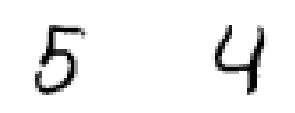

In [33]:
for i, image in enumerate([image1, image2]):
    plt.subplot(2, 2, i + 1)
    plt.axis('off')
    plt.imshow( (np.reshape(image, (28, 28)) * 255).astype(np.uint8), cmap=plt.cm.gray_r, interpolation='nearest')

Build a scoring dictionary consisting of two digits and send it to the deployed model to get predictions.

In [34]:
# Build scoring dictionary which has two digits (image1 and image2).
scoring_payload = {
    client.deployments.ScoringMetaNames.INPUT_DATA: [{
        'values': [image1, image2]
    }]
}

In [35]:
# send the scoring payload to deployed model to get predictions
predictions = client.deployments.score(deployment_uid, scoring_payload)
print("Scoring results:", predictions)

Scoring results: {'predictions': [{'values': [5, 4]}]}


You can now delete the deployment, model, training run, and model definition using the following code.

In [36]:
client.deployments.delete(deployment_uid)

'SUCCESS'

In [37]:
client.repository.delete(model_uid)

'SUCCESS'

In [38]:
client.training.cancel(training_run_guid_async, hard_delete=True)

'SUCCESS'

In [39]:
client.model_definitions.delete(definition_uid)

'SUCCESS'

<a id="summary"></a>
## 7. Summary and next steps     

You successfully completed this notebook! 
 
You learned how to use `watson-machine-learning-client-V4` to train and score TensorFlow models. You created a model definition and trained a deep learning model. Then you saved, deployed, and scored the model within a deployment space.

### Resources <a id="resources"></a>

To learn more about configurations used in this notebook or more sample notebooks, tutorials, documentation, how-tos, and blog posts, check out these links:

<div class="alert alert-block alert-success"><a id="resources"></a>

<h4>IBM documentation</h4>
<br>
 <li> <a href="https://wml-api-pyclient-dev-v4.mybluemix.net" target="_blank" rel="noopener no referrer">watson-machine-learning</a></li> 
 <li> <a href="https://www.ibm.com/support/knowledgecenter/SSQNUZ_3.0.0/cpd/overview/welcome.html" target="_blank" rel="noopener noreferrer">CP4D 3.0</a></li>
 <li> <a href="https://www.ibm.com/support/knowledgecenter/SSQNUZ_3.0.0/wsj/local/wmla.html" target="_blank" rel="noopener no referrer">Watson Machine Learning Accelerator</a></li>
 <li> <a href="https://www.ibm.com/support/knowledgecenter/SSQNUZ_3.0.0/wsj/analyze-data/ml-experimnt-builder_local.html" target="_blank" rel="noopener no referrer">Training deep learning experiments</a></li>
 <li> <a href="https://www.ibm.com/support/knowledgecenter/SSQNUZ_3.0.0/wsj/analyze-data/ml_local_tutorial_tensorflow_experiment-builder.html" target="_blank" rel="noopener no referrer">Deep learning experiment tutorial</a></li> 
 
<h4> IBM Samples</h4>
<br>
 <li> <a href="https://github.com/IBMDataScience/sample-notebooks" target="_blank" rel="noopener noreferrer">Sample notebooks</a></li>
 
<h4> Others</h4>
<br>
 <li> <a href="https://www.python.org" target="_blank" rel="noopener noreferrer">Official Python website</a></li>
 <li> <a href="https://matplotlib.org" target="_blank" rel="noopener noreferrer">Matplotlib: Python plotting</a></li>
 </div>

### Citations
Y. LeCun, L. Bottou, Y. Bengio, and P. Haffner. "Gradient-based learning applied to document recognition." Proceedings of the IEEE, 86(11):2278-2324, November 1998.

### Authors

**Lukasz Cmielowski**, PhD, is a Automation Architect and Data Scientist at IBM with a track record of developing enterprise-level applications that substantially increase the clients' ability to turn data into actionable knowledge.

<hr>
Copyright © 2017-2020 IBM. This notebook and its source code are released under the terms of the MIT License.

<div style="background:#F5F7FA; height:110px; padding: 2em; font-size:14px;">
<span style="font-size:18px;color:#152935;">Love this notebook? </span>
<span style="font-size:15px;color:#152935;float:right;margin-right:40px;">Don't have an account yet?</span><br>
<span style="color:#5A6872;">Share it with your colleagues and help them discover the power of Watson Studio!</span>
<span style="border: 1px solid #3d70b2;padding:8px;float:right;margin-right:40px; color:#3d70b2;"><a href="https://ibm.co/wsnotebooks" target="_blank" style="color: #3d70b2;text-decoration: none;">Sign Up</a></span><br>
</div>